In [1]:
# Setup.
import pandas as pd
import requests
import json
import matplotlib as plt
import numpy as np
import itertools 
from datetime import datetime

In [2]:
def get_qualifying_race_results(year_number,round_number):
    url = 'http://ergast.com/api/f1/{}/{}/results.json'.format(year_number, round_number)
    try:
        resp = requests.get(url).json()#.get('MRData').get('RaceTable').get('Races')[0].get('Results')
        results = resp.get('MRData').get('RaceTable').get('Races')[0].get('Results')
        circuit = resp.get('MRData').get('RaceTable').get('Races')[0].get('Circuit')
        temp_df =  pd.DataFrame.from_records(results)
        temp_df['circuitName'] = circuit.get('circuitName')
        temp_df['lat'] = circuit.get('Location').get('lat')
        temp_df['long'] = circuit.get('Location').get('long')
        temp_df['country'] = circuit.get('Location').get('country')
        temp_df['locality'] = circuit.get('Location').get('locality')
        temp_df['round'] = round_number
        temp_df['year'] = year_number
        return temp_df
    # Adding a pass here as not all years have the same number of rounds.
    # In order for it to complete when there is no round for that year,
    # we need to "pass" that row.
    except:
        pass

# Create list of years and rounds to loop through when pooling data.

seasons = np.arange(2003,2018,1)
rounds = np.arange(1,20,1)

# Create a list of arrays which is required for itertools to create the combination of the two lists.
seasons_rounds = [seasons,rounds]

# Create a list of pairs of every combination of years and round.
seasons_rounds = list(itertools.product(*seasons_rounds))

# Initiate empty list within which we will store the dataframes outputted by the function get_qualifying_races.
results = []

# Unpack the year/round tuples and run each set through the API call function above.
# Store the results in the empty list 'results'.
for combo in seasons_rounds:
    yr, r = combo
    temp_result =  get_qualifying_race_results(yr, r)
    results.append(temp_result)
    
df = pd.concat(results, axis=0)

# Extract driverId into its own column.
df['driverId']= df.Driver.map(lambda x: x.get('driverId'))

df.drop(['Time','Constructor','FastestLap'], axis=1, inplace=True)
df.head()

C:\Users\Ryan\Anaconda3\lib\site-packages\ipykernel_launcher.py:43: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



,Driver,circuitName,country,grid,laps,lat,locality,long,number,points,position,positionText,round,status,year,driverId
0,"{'driverId': 'coulthard', 'code': 'COU', 'url'...",Albert Park Grand Prix Circuit,Australia,11,58,-37.8497,Melbourne,144.968,5,10,1,1,1,Finished,2003,coulthard
1,"{'driverId': 'montoya', 'code': 'MON', 'url': ...",Albert Park Grand Prix Circuit,Australia,3,58,-37.8497,Melbourne,144.968,3,8,2,2,1,Finished,2003,montoya
2,"{'driverId': 'raikkonen', 'permanentNumber': '...",Albert Park Grand Prix Circuit,Australia,15,58,-37.8497,Melbourne,144.968,6,6,3,3,1,Finished,2003,raikkonen
3,"{'driverId': 'michael_schumacher', 'code': 'MS...",Albert Park Grand Prix Circuit,Australia,1,58,-37.8497,Melbourne,144.968,1,5,4,4,1,Finished,2003,michael_schumacher
4,"{'driverId': 'trulli', 'code': 'TRU', 'url': '...",Albert Park Grand Prix Circuit,Australia,12,58,-37.8497,Melbourne,144.968,7,4,5,5,1,Finished,2003,trulli


In [3]:
api = 'http://ergast.com/api/f1/2008/5/results.json'
resp = requests.get(api).json()

def get_race_result(season_number, year ):
    api = 'http://ergast.com/api/f1/{}/{}/results.json'.format(year, season_number)
    data = requests.get(api).json()
                                         #resp.get('MRData').get('RaceTable').get('Races')[0].get('Results')
    temp_df =  pd.DataFrame.from_records(data.get('MRData').get('RaceTable').get('Races')[0].get('Results'))
    circuit=data.get('MRData').get('RaceTable').get('Races')[0].get('Circuit')
    temp_df['circuit_name']=circuit.get('circuitName')
    temp_df['seasonNbr'] = season_number
    temp_df['year'] = year
    return temp_df

results = []
seasons = np.arange(2003,2018,1)
rounds = np.arange(1,15,1)
for s in seasons:
    for r in rounds:
        result = get_race_result(r, s)
        results.append(result)

out = pd.concat(results, axis=0)
out['driver_id']=out.Driver.map(lambda x: x.get('driverId'))
out['car_make']=out.Constructor.map(lambda x: x.get('name'))
out['driver_nat']=out.Driver.map(lambda x: x.get('nationality'))\

df=out[['driver_id','year','seasonNbr','position','status','car_make','driver_nat','points','circuit_name']]
df['points'] = df['points'].astype(float)
df.head()

C:\Users\Ryan\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\Ryan\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,driver_id,year,seasonNbr,position,status,car_make,driver_nat,points,circuit_name
0,coulthard,2003,1,1,Finished,McLaren,British,10.0,Albert Park Grand Prix Circuit
1,montoya,2003,1,2,Finished,Williams,Colombian,8.0,Albert Park Grand Prix Circuit
2,raikkonen,2003,1,3,Finished,McLaren,Finnish,6.0,Albert Park Grand Prix Circuit
3,michael_schumacher,2003,1,4,Finished,Ferrari,German,5.0,Albert Park Grand Prix Circuit
4,trulli,2003,1,5,Finished,Renault,Italian,4.0,Albert Park Grand Prix Circuit


In [4]:
api='http://ergast.com/api/f1/2010/drivers.json'
resp=requests.get(api).json()
driver_info = resp.get('MRData').get('DriverTable').get('Drivers')

def get_driver_info(season_number, year ):
    api = 'http://ergast.com/api/f1/{}/{}/drivers.json'.format(year, season_number)
    data = requests.get(api).json()
    temp_df =  pd.DataFrame.from_records(driver_info)
    temp_df['seasonNbr'] = season_number
    temp_df['year'] = year
    return temp_df

_resp = get_driver_info(5, 2008)
years = [2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2018 ]
seasons = [1,2,3,4,5,6,7,8,9,10,11,12,13,14]
results = []
for y in years:
    for s in seasons:
        result = get_driver_info(s, y)
        results.append(result)

df = pd.DataFrame.from_records(driver_info)

df = pd.concat(results, axis = 0)

def calc_age(some_brday):
    date_time_bday = datetime.strptime(some_brday, '%Y-%m-%d')
    return round((datetime.today() - date_time_bday).days / 365)


# datetime.strptime(df.iloc[0].dateOfBirth, '%Y-%m-%d')
# (datetime.today() - datetime.strptime(df.iloc[0].dateOfBirth, '%Y-%m-%d')).days / 365

df['years_old'] = df.dateOfBirth.map(calc_age)

new = df.drop_duplicates(subset='driverId', keep= 'first', inplace=False)

bar = new.groupby('nationality')['driverId'].count()

bar.plot(kind = 'bar', figsize = (15,10))

df.head()

,code,dateOfBirth,driverId,familyName,givenName,nationality,permanentNumber,url,seasonNbr,year,years_old
0,ALG,1990-03-23,alguersuari,Alguersuari,Jaime,Spanish,NaN,http://en.wikipedia.org/wiki/Jaime_Alguersuari,1,2003,29
1,ALO,1981-07-29,alonso,Alonso,Fernando,Spanish,14,http://en.wikipedia.org/wiki/Fernando_Alonso,1,2003,38
2,BAR,1972-05-23,barrichello,Barrichello,Rubens,Brazilian,NaN,http://en.wikipedia.org/wiki/Rubens_Barrichello,1,2003,47
3,BUE,1988-10-31,buemi,Buemi,Sébastien,Swiss,NaN,http://en.wikipedia.org/wiki/S%C3%A9bastien_Buemi,1,2003,30
4,BUT,1980-01-19,button,Button,Jenson,British,22,http://en.wikipedia.org/wiki/Jenson_Button,1,2003,39


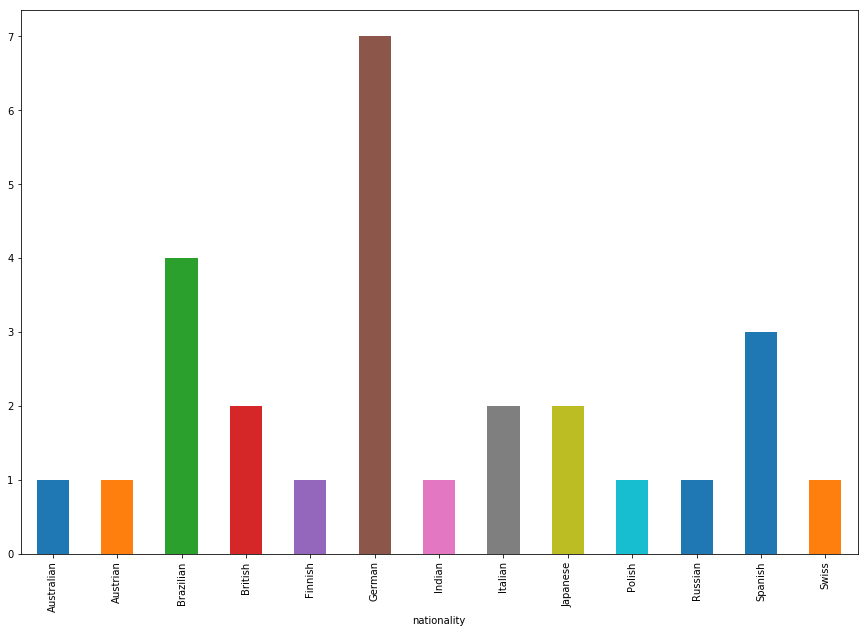

In [5]:
df['years_old'] = df.dateOfBirth.map(calc_age)

new = df.drop_duplicates(subset='driverId', keep= 'first', inplace=False)

bar = new.groupby('nationality')['driverId'].count()

bar.plot(kind = 'bar', figsize = (15,10))